In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
csv_path = "/content/drive/MyDrive/Hackdavis 2021/Data/fulldata.csv"

df = pd.read_csv(csv_path)
print(df.columns)

Index(['DATE', 'LAT', 'LON', 'T2M_MAX', 'T2M_MIN', 'T2M', 'PRECTOT', 'RH2M',
       'PS', 'WS10M_MIN', 'WS10M_MAX', 'WS10M', 'FIRE', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS'],
      dtype='object')


In [28]:
len(df)

27555

In [29]:
df.head()

,DATE,LAT,LON,T2M_MAX,T2M_MIN,T2M,PRECTOT,RH2M,PS,WS10M_MIN,WS10M_MAX,WS10M,FIRE,FIRE_SIZE,FIRE_SIZE_CLASS
0,7/1/2013,32.25,-113.75,41.29,27.80,34.42,0.29,31.01,98.28,3.96,9.81,7.15,NOFIRE,0.0,NaN
1,7/1/2014,32.25,-113.75,40.56,23.88,31.87,0.00,25.64,98.22,2.89,7.67,5.24,NOFIRE,0.0,NaN
2,7/1/2015,32.25,-113.75,35.24,26.20,30.49,3.11,44.89,98.64,1.61,7.63,5.29,NOFIRE,0.0,NaN
3,7/10/2013,32.25,-113.75,35.60,26.06,30.67,1.10,54.02,98.64,4.87,9.62,6.13,NOFIRE,0.0,NaN
4,7/10/2014,32.25,-113.75,39.95,27.56,32.83,0.02,41.77,98.46,2.88,5.35,4.06,NOFIRE,0.0,NaN


In [30]:
final_df = df[['DATE', 'LAT', 'LON', 'T2M_MAX', 'T2M_MIN', 'T2M', 'PRECTOT', 'RH2M',
       'PS', 'WS10M_MIN', 'WS10M_MAX', 'WS10M', 'FIRE', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS']]

feature_keys = final_df.columns[3:-4]
print("FEATURE KEYS")
print(feature_keys)
label_keys = final_df.columns[-3:-1]

print("LABEL KEYS")
print(label_keys)
split_fraction = 0.715
train_split = int(split_fraction * int(df.shape[0]))
print("train_split", train_split)
step = 1

learning_rate = 0.1
batch_size = 50
epochs = 50

print(label_keys.shape[0])


def normalize(data, train_split):
    data_mean = data[:train_split].min(axis=0)
    print(data_mean)
    data_std = data[:train_split].max(axis=0)
    print(data_std)
    return (data - data_mean) / (data_std-data_mean)

FEATURE KEYS
Index(['T2M_MAX', 'T2M_MIN', 'T2M', 'PRECTOT', 'RH2M', 'PS', 'WS10M_MIN',
       'WS10M_MAX'],
      dtype='object')
LABEL KEYS
Index(['FIRE', 'FIRE_SIZE'], dtype='object')
train_split 19701
2


In [31]:
print(
    "The selected parameters are:",
    ", ".join([feature_keys[i] for i in range(feature_keys.shape[0])]),
)
selected_features = [feature_keys[i] for i in range(feature_keys.shape[0])]
features = final_df[selected_features]
features.index = final_df[['DATE', 'LAT', 'LON']]
print(features.head())

features = normalize(features.values, train_split)
features = pd.DataFrame(features)
print(features.head())



train_data = features[0 : train_split - 1]
val_data = features[train_split:]

selected_labels = [label_keys[i] for i in range(label_keys.shape[0])]
print(selected_labels)
labels = final_df[selected_labels]
labels.index = final_df[['DATE', 'LAT', 'LON']]
labels.head()

labels['FIRE_SIZE'] = normalize(labels['FIRE_SIZE'].values, train_split)
labels['FIRE'] = pd.get_dummies(labels['FIRE'])
labels = pd.DataFrame(labels)
labels.head()
type(labels)
print(labels)
print(train_split)

train_labels = labels[0 : train_split - 1]
val_labels = labels[train_split:]

The selected parameters are: T2M_MAX, T2M_MIN, T2M, PRECTOT, RH2M, PS, WS10M_MIN, WS10M_MAX
                             T2M_MAX  T2M_MIN  ...  WS10M_MIN  WS10M_MAX
(7/1/2013, 32.25, -113.75)     41.29    27.80  ...       3.96       9.81
(7/1/2014, 32.25, -113.75)     40.56    23.88  ...       2.89       7.67
(7/1/2015, 32.25, -113.75)     35.24    26.20  ...       1.61       7.63
(7/10/2013, 32.25, -113.75)    35.60    26.06  ...       4.87       9.62
(7/10/2014, 32.25, -113.75)    39.95    27.56  ...       2.88       5.35

[5 rows x 8 columns]
[12.82  3.87  7.63  0.    7.2  74.42  0.    1.23]
[ 47.85  31.32  38.79  21.76  98.3  102.08  10.47  15.21]
          0         1         2  ...         5         6         7
0  0.812732  0.871767  0.859756  ...  0.862617  0.378223  0.613734
1  0.791893  0.728962  0.777920  ...  0.860448  0.276027  0.460658
2  0.640023  0.813479  0.733633  ...  0.875633  0.153773  0.457797
3  0.650300  0.808379  0.739409  ...  0.875633  0.465138  0.600143
4  0.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
print(features)
print(labels)

              0         1         2  ...         5         6         7
0      0.812732  0.871767  0.859756  ...  0.862617  0.378223  0.613734
1      0.791893  0.728962  0.777920  ...  0.860448  0.276027  0.460658
2      0.640023  0.813479  0.733633  ...  0.875633  0.153773  0.457797
3      0.650300  0.808379  0.739409  ...  0.875633  0.465138  0.600143
4      0.774479  0.863024  0.808729  ...  0.869125  0.275072  0.294707
...         ...       ...       ...  ...       ...       ...       ...
27550  0.605766  0.453916  0.539795  ...  0.691251  0.106972  0.068670
27551  0.498144  0.396357  0.431964  ...  0.680043  0.031519  0.053648
27552  0.566086  0.350820  0.483312  ...  0.699928  0.017192  0.101574
27553  0.593777  0.426594  0.512837  ...  0.689805  0.124164  0.097997
27554  0.391950  0.304554  0.339217  ...  0.675705  0.011461  0.092275

[27555 rows x 8 columns]
                             FIRE  FIRE_SIZE
(7/1/2013, 32.25, -113.75)      0        0.0
(7/1/2014, 32.25, -113.75)      

The selected parameters are: T2M_MAX, T2M_MIN, T2M, PRECTOT, RH2M, PS, WS10M_MIN, WS10M_MAX, WS10M


In [32]:
x_train = train_data[0:-14].values
y_train = train_labels[14:]

sequence_length = 14

print(train_data)
print(labels)

              0         1         2  ...         5         6         7
0      0.812732  0.871767  0.859756  ...  0.862617  0.378223  0.613734
1      0.791893  0.728962  0.777920  ...  0.860448  0.276027  0.460658
2      0.640023  0.813479  0.733633  ...  0.875633  0.153773  0.457797
3      0.650300  0.808379  0.739409  ...  0.875633  0.465138  0.600143
4      0.774479  0.863024  0.808729  ...  0.869125  0.275072  0.294707
...         ...       ...       ...  ...       ...       ...       ...
19695  0.363403  0.504554  0.442875  ...  0.203543  0.086915  0.180258
19696  0.576934  0.444809  0.526316  ...  0.203905  0.075454  0.391989
19697  0.391950  0.362842  0.398909  ...  0.192697  0.057307  0.309013
19698  0.481302  0.451366  0.487805  ...  0.200289  0.047755  0.214592
19699  0.523266  0.291075  0.470796  ...  0.198482  0.070678  0.202432

[19700 rows x 8 columns]
                             FIRE  FIRE_SIZE
(7/1/2013, 32.25, -113.75)      0        0.0
(7/1/2014, 32.25, -113.75)      

In [33]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [34]:
import numpy as np


x_val = val_data[0:-14].values
y_val = val_labels[14:]


dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


print(y_val)
for batch in dataset_train.take(1):
    inputs, targets = batch





print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)



                             FIRE  FIRE_SIZE
(7/29/2015, 38.75, -117.25)     0        0.0
(7/3/2013, 38.75, -117.25)      0        0.0
(7/3/2014, 38.75, -117.25)      0        0.0
(7/3/2015, 38.75, -117.25)      0        0.0
(7/30/2013, 38.75, -117.25)     0        0.0
...                           ...        ...
(7/8/2014, 42.25, -123.75)      0        0.0
(7/8/2015, 42.25, -123.75)      0        0.0
(7/9/2013, 42.25, -123.75)      0        0.0
(7/9/2014, 42.25, -123.75)      0        0.0
(7/9/2015, 42.25, -123.75)      0        0.0

[7840 rows x 2 columns]
Input shape: (50, 14, 8)
Target shape: (50, 2)


In [37]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(40, activation = 'sigmoid')(inputs)
#layer2 = keras.layers.Dropout(0.2)(lstm_out)
layer3 = keras.layers.Dense(40, activation = 'sigmoid')(lstm_out)
#layer4 = keras.layers.Dropout(0.2)(layer3)
layer3 = keras.layers.Dense(30, activation = 'sigmoid')(layer3)
#layer4 = keras.layers.Dropout(0.2)(layer3)
layer5 = keras.layers.Dense(20, activation = 'sigmoid')(layer3)
#layer6 = keras.layers.Dropout(0.2)(layer5)
outputs = keras.layers.Dense(2, activation = 'sigmoid')(layer5)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mae', metrics = ['accuracy'])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 14, 8)]           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 40)                7840      
_________________________________________________________________
dense_9 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1230      
_________________________________________________________________
dense_11 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 42        
Total params: 11,372
Trainable params: 11,372
Non-trainable params: 0
_______________________________________________________

In [40]:
path_checkpoint = "model_checkpoint.h5"
#es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=15)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=15,
    validation_data=dataset_val,
    callbacks=[modelckpt_callback],
)

Epoch 1/15
394/394 [==============================] - 13s 32ms/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 1.3315e-10 - val_accuracy: 1.0000

Epoch 00001: val_loss improved from inf to 0.00000, saving model to model_checkpoint.h5
Epoch 2/15
394/394 [==============================] - 12s 32ms/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 1.1578e-10 - val_accuracy: 1.0000

Epoch 00002: val_loss improved from 0.00000 to 0.00000, saving model to model_checkpoint.h5
Epoch 3/15
394/394 [==============================] - 13s 33ms/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 1.0131e-10 - val_accuracy: 1.0000

Epoch 00003: val_loss improved from 0.00000 to 0.00000, saving model to model_checkpoint.h5
Epoch 4/15
394/394 [==============================] - 13s 33ms/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 8.9217e-11 - val_accuracy: 1.0000

Epoch 00004: val_loss improved from 0.00000 to 0.00000, saving model to model_checkpoint.h5
Epoch 5/15
394/394 [====================

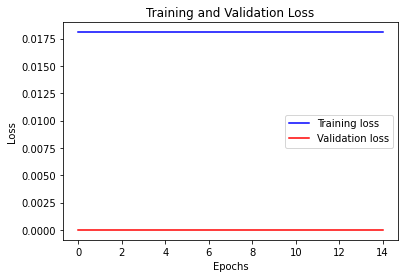

In [41]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

In [62]:
csv_path = "/content/drive/MyDrive/Hackdavis 2021/Data/fulldata_to_predict.csv"

df_test = pd.read_csv(csv_path)
df_test_final = df_test[['YEAR', 'LAT', 'LON', 'T2M_MAX', 'T2M_MIN', 'T2M', 'PRECTOT', 'RH2M','PS', 'WS10M_MIN', 'WS10M_MAX', 'WS10M']]

print(df_test.columns)
print(df_test)

Index(['YEAR', 'LAT', 'LON', 'T2M_MAX', 'T2M_MIN', 'T2M', 'PRECTOT', 'RH2M',
       'PS', 'WS10M_MIN', 'WS10M_MAX', 'WS10M', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS'],
      dtype='object')
         YEAR       LAT        LON  ...  WS10M  FIRE_SIZE  FIRE_SIZE_CLASS
0    5/1/2019  36.99031 -122.11749  ...   2.68        NaN              NaN
1    5/2/2019  36.99031 -122.11749  ...   4.32        NaN              NaN
2    5/3/2019  36.99031 -122.11749  ...   3.60        NaN              NaN
3    5/4/2019  36.99031 -122.11749  ...   3.75        NaN              NaN
4    5/5/2019  36.99031 -122.11749  ...   3.70        NaN              NaN
5    5/6/2019  36.99031 -122.11749  ...   3.73        NaN              NaN
6    5/7/2019  36.99031 -122.11749  ...   3.29        NaN              NaN
7    5/8/2019  36.99031 -122.11749  ...   2.52        NaN              NaN
8    5/9/2019  36.99031 -122.11749  ...   2.88        NaN              NaN
9   5/10/2019  36.99031 -122.11749  ...   2.60        NaN      

In [70]:
feature_keys_test = df_test_final.columns[3:-1]
print(feature_keys_test)
selected_features_test = [feature_keys_test[i] for i in range(feature_keys_test.shape[0])]
features_test = df_test_final[selected_features]
features_test.index = df_test_final[['YEAR', 'LAT', 'LON']]
print(features_test)

features_test = normalize(features_test.values, train_split)
features_test = pd.DataFrame(features_test)
print(features_test)


Index(['T2M_MAX', 'T2M_MIN', 'T2M', 'PRECTOT', 'RH2M', 'PS', 'WS10M_MIN',
       'WS10M_MAX'],
      dtype='object')
                                            T2M_MAX  ...  WS10M_MAX
(5/1/2019, 36.99031, -122.11748999999999)     15.85  ...       4.30
(5/2/2019, 36.99031, -122.11748999999999)     16.33  ...       5.83
(5/3/2019, 36.99031, -122.11748999999999)     16.04  ...       5.39
(5/4/2019, 36.99031, -122.11748999999999)     14.45  ...       5.19
(5/5/2019, 36.99031, -122.11748999999999)     14.31  ...       5.52
(5/6/2019, 36.99031, -122.11748999999999)     14.90  ...       4.62
(5/7/2019, 36.99031, -122.11748999999999)     15.38  ...       4.17
(5/8/2019, 36.99031, -122.11748999999999)     15.33  ...       3.54
(5/9/2019, 36.99031, -122.11748999999999)     15.46  ...       3.79
(5/10/2019, 36.99031, -122.11748999999999)    16.54  ...       4.33
(5/11/2019, 36.99031, -122.11748999999999)    16.39  ...       5.50
(5/12/2019, 36.99031, -122.11748999999999)    15.75  ...       6.14

In [75]:
x_test = features_test.values


sequence_length = 14

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    None,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


In [76]:
x = model.predict(dataset_test, verbose =1, batch_size=1)
d = pd.DataFrame(x)

1/1 [==============================] - 0s 36ms/step


In [77]:
print(d)

               0             1
0   3.328261e-11  3.129452e-11
1   3.328261e-11  3.129452e-11
2   3.328261e-11  3.129452e-11
3   3.328261e-11  3.129452e-11
4   3.328261e-11  3.129452e-11
5   3.328261e-11  3.129452e-11
6   3.328261e-11  3.129452e-11
7   3.328261e-11  3.129452e-11
8   3.328261e-11  3.129452e-11
9   3.328261e-11  3.129452e-11
10  3.328261e-11  3.129452e-11
11  3.328261e-11  3.129452e-11
12  3.328261e-11  3.129452e-11
13  3.328261e-11  3.129452e-11
14  3.328261e-11  3.129452e-11
15  3.328261e-11  3.129452e-11
16  3.328261e-11  3.129452e-11
17  3.328261e-11  3.129452e-11
